## Olimpiai statisztikák
## Készítette: Szász Kristóf (DCFW6L)

Az adatok forrása: https://www.kaggle.com/the-guardian/olympic-games?select=summer.csv

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('summer.csv')

In [3]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
data.isna().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [5]:
data[data.Country.isna() == True]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [6]:
# Maryam Jusuf Jamal - BRN
data.iloc[29603,4] = "MARYAM, Jusuf Jamal"
data.iloc[29603,5] = "BRN"
# Christine Girard - CAN
data.iloc[31072,4] = "GIRARD, Christine"
data.iloc[31072,5] = "CAN"
# Saeid Mohammadpour - IRI
data.iloc[31091,4] = "MOHAMMADPOUR, Saeid"
data.iloc[31091,5] = "IRI"
# Besik Kudukhov
data.iloc[31110,5] = "RUS"

In [7]:
data[data.Country.isna() == True]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


In [8]:
print(data.Year.min() , "-tól " , data.Year.max() , "-ig")  

1896 -tól  2012 -ig


In [9]:
data.Country.unique().shape[0]

147

In [10]:
data.City.groupby(data.City).describe().freq.sort_values(ascending = False).head(5)

City
London         3567
Athens         2149
Los Angeles    2074
Beijing        2042
Sydney         2015
Name: freq, dtype: object

In [11]:
data.Country.groupby(data.Country).describe().freq.sort_values(ascending = False).head(5)

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
Name: freq, dtype: object

In [12]:
data.Medal.groupby(data.Country).describe().freq.sort_values(ascending = False).head(5)

Country
USA    2235
URS     838
GBR     621
FRA     497
ITA     476
Name: freq, dtype: object

In [13]:
countries = data.Country.unique()
countries.sort()

In [14]:
MedalTable = pd.DataFrame({'Country':countries, 'Gold':0, 'Silver':0,'Bronze':0, 'Total Points':0,}, index = countries)
MedalTable.index = np.arange(1, len(MedalTable) + 1)
MedalTable

,Country,Gold,Silver,Bronze,Total Points
1,AFG,0,0,0,0
2,AHO,0,0,0,0
3,ALG,0,0,0,0
4,ANZ,0,0,0,0
5,ARG,0,0,0,0
...,...,...,...,...,...
143,VIE,0,0,0,0
144,YUG,0,0,0,0
145,ZAM,0,0,0,0
146,ZIM,0,0,0,0


In [15]:
def medalTablePoints(dataframe):
    if dataframe['Medal'] == 'Gold':
        MedalTable.at[MedalTable.loc[MedalTable.Country == dataframe.Country].index[0], 'Gold'] += 1
        MedalTable.at[MedalTable.loc[MedalTable.Country == dataframe.Country].index[0], 'Total Points'] += 3
    elif dataframe['Medal'] == 'Silver':
        MedalTable.at[MedalTable.loc[MedalTable.Country == dataframe.Country].index[0], 'Silver'] += 1
        MedalTable.at[MedalTable.loc[MedalTable.Country == dataframe.Country].index[0], 'Total Points'] += 2
    elif dataframe['Medal'] == 'Bronze':
        MedalTable.at[MedalTable.loc[MedalTable.Country == dataframe.Country].index[0], 'Bronze'] += 1
        MedalTable.at[MedalTable.loc[MedalTable.Country == dataframe.Country].index[0], 'Total Points'] += 1

In [16]:
data.apply(medalTablePoints, axis = 1)

0        None
1        None
2        None
3        None
4        None
         ... 
31160    None
31161    None
31162    None
31163    None
31164    None
Length: 31165, dtype: object

In [17]:
MedalTable = MedalTable.sort_values('Total Points', ascending = False)
MedalTable['Rank'] = range(1,148)

In [18]:
MedalTable.style.hide_index()

Country,Gold,Silver,Bronze,Total Points,Rank
USA,2235,1252,1098,10307,1
URS,838,627,584,4352,2
GBR,546,621,553,3433,3
FRA,408,491,497,2703,4
ITA,476,416,404,2664,5
GER,452,378,475,2587,6
HUN,412,316,351,2219,7
AUS,312,405,472,2218,8
SWE,349,367,328,2109,9
GDR,329,271,225,1754,10


In [19]:
data.Gender.groupby(data.Gender).describe().freq.sort_values(ascending = False)

Gender
Men      22746
Women     8419
Name: freq, dtype: object

In [20]:
men = data.Gender.groupby(data.Gender).describe().freq.sort_values(ascending = False)[0]
women = data.Gender.groupby(data.Gender).describe().freq.sort_values(ascending = False)[1]

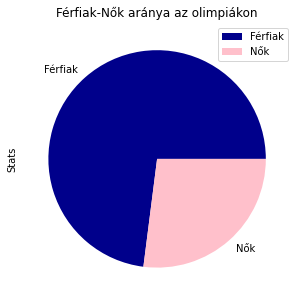

In [21]:
df = pd.DataFrame({'Stats': [men, women]},
                  index=['Férfiak', 'Nők'])
plot = df.plot.pie(y='Stats', 
                   figsize=(5, 5), 
                   title = 'Férfiak-Nők aránya az olimpiákon', 
                   colors = ['darkblue', 'pink'])

In [22]:
data.Athlete.mode()

0    PHELPS, Michael
dtype: object

In [23]:
data[data.Gender == 'Men'].Athlete.mode()

0    PHELPS, Michael
dtype: object

In [24]:
data[data.Gender == 'Women'].Athlete.mode()

0    LATYNINA, Larisa
dtype: object

In [25]:
data[(data.Gender == "Men") & (data.Country == "HUN")].mode() 

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1968,London,Aquatics,Fencing,"GEREVICH, Aladar",HUN,Men,Water Polo,Gold


In [26]:
data[(data.Gender == "Women") & (data.Country == "HUN")].mode() 

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1952,Helsinki,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,Handball,Bronze


In [27]:
data[data.Athlete == "GEREVICH, Aladar"]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
6053,1932,Los Angeles,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,Sabre Team,Gold
6757,1936,Berlin,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,Sabre Individual,Bronze
6767,1936,Berlin,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,Sabre Team,Gold
7642,1948,London,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,Sabre Individual,Gold
7651,1948,London,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,Sabre Team,Gold
8459,1952,Helsinki,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,Foil Team,Bronze
8478,1952,Helsinki,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,Sabre Individual,Silver
8486,1952,Helsinki,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,Sabre Team,Gold
9378,1956,Melbourne / Stockholm,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,Sabre Team,Gold
10295,1960,Rome,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,Sabre Team,Gold


In [28]:
data[data.Country == "HUN"].mode()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1952.0,London,Aquatics,Fencing,"GEREVICH, Aladar",HUN,Men,Water Polo,Gold
1,NaN,NaN,NaN,NaN,"KELETI, Agnes",NaN,NaN,NaN,NaN


In [29]:
data[data.Athlete == "KELETI, Agnes"]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
8542,1952,Helsinki,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,Floor Exercises,Gold
8606,1952,Helsinki,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,Team Competition,Silver
8614,1952,Helsinki,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,"Team, Portable Apparatus",Bronze
8635,1952,Helsinki,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,Uneven Bars,Bronze
9436,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,Balance Beam,Gold
9444,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,Floor Exercises,Gold
9454,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,Individual All-Round,Silver
9498,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,Team Competition,Silver
9516,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,"Team, Portable Apparatus",Gold
9527,1956,Melbourne / Stockholm,Gymnastics,Artistic G.,"KELETI, Agnes",HUN,Women,Uneven Bars,Gold


In [30]:
goldMedalPayOuts = {'Singapore': 1000, 'Indonesia': 746, 'Kazakhstan': 250,
                    'Azerbaijan': 248, 'Italy': 166, 'Hungary': 125, 'Russia': 61,
                    'France': 55, 'USA': 37.5, 'South Africa': 37, 'Germany': 22,
                    'Canada': 15, 'Australia': 13.8} 

In [31]:
silverMedalPayOuts = {'Singapore': 500, 'Indonesia': 378, 'Kazakhstan': 150,
                    'Azerbaijan': 124, 'Italy': 83, 'Hungary': 89, 'Russia': 38,
                    'France': 22, 'USA': 22.5, 'South Africa': 19, 'Germany': 17,
                    'Canada': 11, 'Australia': 10.35} 

In [32]:
bronzeMedalPayOuts = {'Singapore': 250, 'Indonesia': 188, 'Kazakhstan': 75,
                    'Azerbaijan': 62, 'Italy': 55, 'Hungary': 71, 'Russia': 26,
                    'France': 14, 'USA': 15, 'South Africa': 7, 'Germany': 11,
                    'Canada': 9, 'Australia': 6.9} 

In [33]:
goldMedalPayOuts

{'Singapore': 1000,
 'Indonesia': 746,
 'Kazakhstan': 250,
 'Azerbaijan': 248,
 'Italy': 166,
 'Hungary': 125,
 'Russia': 61,
 'France': 55,
 'USA': 37.5,
 'South Africa': 37,
 'Germany': 22,
 'Canada': 15,
 'Australia': 13.8}

In [34]:
silverMedalPayOuts

{'Singapore': 500,
 'Indonesia': 378,
 'Kazakhstan': 150,
 'Azerbaijan': 124,
 'Italy': 83,
 'Hungary': 89,
 'Russia': 38,
 'France': 22,
 'USA': 22.5,
 'South Africa': 19,
 'Germany': 17,
 'Canada': 11,
 'Australia': 10.35}

In [35]:
bronzeMedalPayOuts

{'Singapore': 250,
 'Indonesia': 188,
 'Kazakhstan': 75,
 'Azerbaijan': 62,
 'Italy': 55,
 'Hungary': 71,
 'Russia': 26,
 'France': 14,
 'USA': 15,
 'South Africa': 7,
 'Germany': 11,
 'Canada': 9,
 'Australia': 6.9}

In [36]:
medalPayouts = pd.DataFrame({'GoldMedalPayOuts':goldMedalPayOuts, 'SilverMedalPayOuts': silverMedalPayOuts,
                             'BronzeMedalPayOuts': bronzeMedalPayOuts})

In [37]:
medalPayouts = medalPayouts.astype(int)

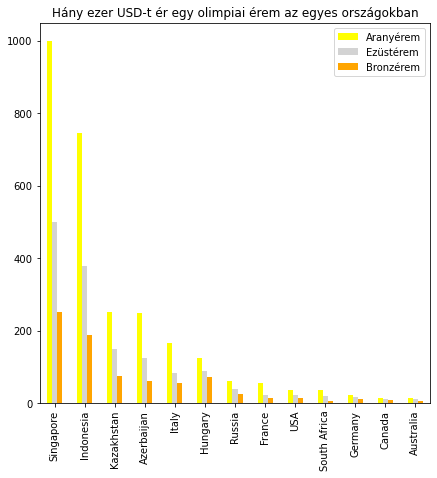

In [38]:
medalPayouts.plot(kind = "bar", figsize=(7,7),
            title = 'Hány ezer USD-t ér egy olimpiai érem az egyes országokban', 
            color = ['yellow', 'lightgray', 'orange'])
plt.legend(['Aranyérem', 'Ezüstérem', 'Bronzérem'])

<AxesSubplot:>

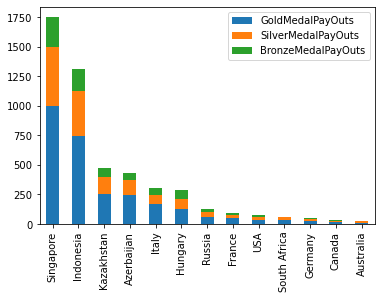

In [39]:
medalPayouts.plot.bar(stacked = True)

### Ezek az adatok csak fizetés után lettek volna letölthetőek csv-be, ezért kézzel vettem fel őket
#### Forrás: https://www.statista.com/statistics/1090581/olympics-number-athletes-by-gender-since-1896/

In [40]:
menParticipants = {'1896': 241, '1900': 975, '1904': 645,
                    '1908': 1971, '1912': 2359, '1920': 2561, '1924': 2954,
                    '1928': 2606, '1932': 1206, '1936': 3632, '1948': 3714,
                    '1952': 4436, '1956': 2938, '1960': 4727, '1968': 4473, '1972': 6075,
                    '1976': 4824, '1980': 4064, '1984': 5263, '1988': 6197, '1992': 6652,
                    '1996': 6806, '2000': 6582, '2004': 6296, '2008': 6305, '2012': 5892} 

In [41]:
womenParticipants = {'1896': 0, '1900': 22, '1904': 6,
                    '1908': 37, '1912': 48, '1920': 65, '1924': 135,
                    '1928': 277, '1932': 126, '1936': 331, '1948': 390,
                    '1952': 519, '1956': 376, '1960': 611, '1968': 678, '1972': 1059,
                    '1976': 1260, '1980': 1115, '1984': 1566, '1988': 2194, '1992': 2704,
                    '1996': 3512, '2000': 4069, '2004': 4329, '2008': 4637, '2012': 4676}

In [42]:
menAndWomenParticipants = pd.DataFrame({'menParticipants':menParticipants, 'womenParticipants': womenParticipants})

In [43]:
menAndWomenParticipants = menAndWomenParticipants.astype(int)

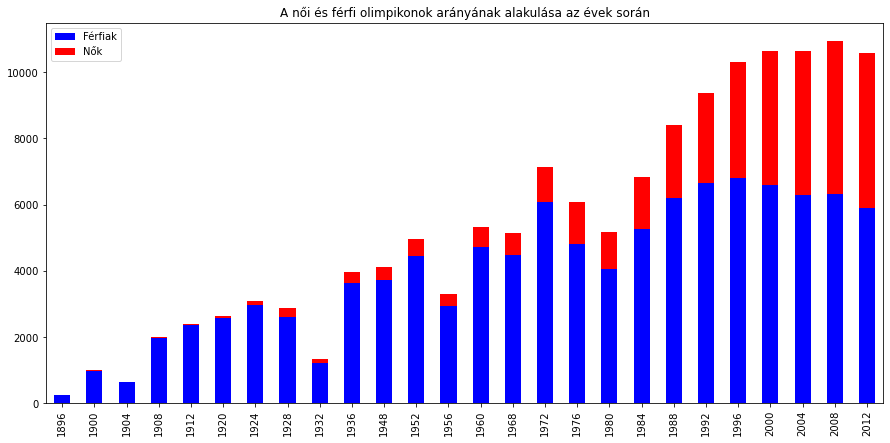

In [44]:
menAndWomenParticipants.plot(kind = "bar", figsize=(15,7),
            title = 'A női és férfi olimpikonok arányának alakulása az évek során', 
            color = ['blue', 'red'], stacked = True)
plt.legend(['Férfiak', 'Nők'])

In [45]:
menParticipants = pd.DataFrame({'Year': menParticipants})

In [46]:
womenParticipants = pd.DataFrame({'Year': womenParticipants})

In [47]:
menParticipants

,Year
1896,241
1900,975
1904,645
1908,1971
1912,2359
1920,2561
1924,2954
1928,2606
1932,1206
1936,3632


In [48]:
womenParticipants

,Year
1896,0
1900,22
1904,6
1908,37
1912,48
1920,65
1924,135
1928,277
1932,126
1936,331


In [49]:
percentage = womenParticipants/(menParticipants + womenParticipants)

<Figure size 1080x1152 with 0 Axes>

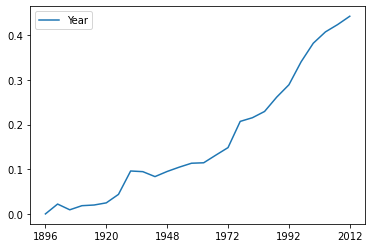

<Figure size 1080x1152 with 0 Axes>

In [50]:
percentage.plot()
plt.figure(figsize = (15,16))

    -    Egyes sportágakban melyek a legjobb országok
    -    Egyes országok mely sportágakban a legjobbak

In [52]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [72]:
data.Discipline.groupby(data.Country).describe().sort_values(by = 'count', ascending = False).top.head(15)

Country
USA      Athletics
URS    Artistic G.
GBR      Athletics
FRA        Fencing
GER         Rowing
ITA        Fencing
AUS       Swimming
HUN        Fencing
SWE       Shooting
NED         Hockey
GDR         Rowing
CHN    Artistic G.
JPN    Artistic G.
RUS      Athletics
CAN         Rowing
Name: top, dtype: object

In [71]:
data.Country.groupby(data.Discipline).describe().sort_values(by = 'count', ascending = False).top.head(15)

Discipline
Athletics          USA
Rowing             USA
Swimming           USA
Artistic G.        URS
Fencing            ITA
Football           USA
Hockey             NED
Shooting           USA
Sailing            USA
Basketball         USA
Handball           KOR
Volleyball         URS
Canoe / Kayak F    HUN
Boxing             USA
Water polo         HUN
Name: top, dtype: object

In [75]:
disciplineDf = pd.DataFrame({'Discipline': data.Discipline.groupby(data.Country).describe().sort_values(by = 'count', ascending = False).top.head(15)})

In [76]:
disciplineDf

,Discipline
Country,
USA,Athletics
URS,Artistic G.
GBR,Athletics
FRA,Fencing
GER,Rowing
ITA,Fencing
AUS,Swimming
HUN,Fencing
SWE,Shooting


In [77]:
countryDf = pd.DataFrame({'Country':data.Country.groupby(data.Discipline).describe().sort_values(by = 'count', ascending = False).top.head(15)})

In [78]:
countryDf

,Country
Discipline,
Athletics,USA
Rowing,USA
Swimming,USA
Artistic G.,URS
Fencing,ITA
Football,USA
Hockey,NED
Shooting,USA
Sailing,USA
